### Project_Separate_Sentences

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
import os
import math
from IPython.display import clear_output, display
import time
import warnings
warnings.filterwarnings('ignore')
import string
import heapq
import numpy

## Preliminaries 

In [2]:
# read the data
data = pd.read_pickle("./final_data.pkl")
articles = pd.read_pickle('./final_articles.pkl')

In [3]:
data.head()

,raw_claim,cleaned_claim,stemmed_claims,stemmed_stopword_claims,tokenized_claim,claimant,date,cont_days,year,month,label,article_array
0,A line from George Orwell's novel 1984 predict...,a line from george orwells novel 1984 predicts...,a line from georg orwel novel 1984 predict the...,line georg orwel novel 1984 predict power smar...,"[line, georg, orwel, novel, 1984, predict, pow...",Unknown,2017-07-17,11520,2017,7,0,"[122094, 122580, 130685, 134765]"
1,Maine legislature candidate Leslie Gibson insu...,maine legislature candidate leslie gibson insu...,main legislatur candid lesli gibson insult par...,main legislatur candid lesli gibson insult par...,"[main, legislatur, candid, lesli, gibson, insu...",Unknown,2018-03-17,11763,2018,3,2,"[106868, 127320, 128060]"
2,A 17-year-old girl named Alyssa Carson is bein...,a 17yearold girl named alyssa carson is being ...,a 17yearold girl name alyssa carson is be trai...,17yearold girl name alyssa carson train nasa b...,"[17yearold, girl, name, alyssa, carson, train,...",Unknown,2018-07-18,11886,2018,7,1,"[132130, 132132, 149722]"
3,In 1988 author Roald Dahl penned an open lette...,in 1988 author roald dahl penned an open lette...,in 1988 author roald dahl pen an open letter u...,1988 author roald dahl pen open letter urg par...,"[1988, author, roald, dahl, pen, open, letter,...",Unknown,2019-02-04,12087,2019,2,2,"[123254, 123418, 127464]"
4,"When it comes to fighting terrorism, ""Another ...",when it comes to fighting terrorism another th...,when it come to fight terror anoth thing we kn...,come fight terror anoth thing know doe work ba...,"[come, fight, terror, anoth, thing, know, doe,...",Hillary Clinton,2016-03-22,11038,2016,3,2,"[41099, 89899, 72543, 82644, 95344, 88361]"


In [4]:
articles.head()

,raw_articles,cleaned_articles,stemmed_articles,stemmed_stopwords_articles,tokenized_articles,cleaned_sentence,tokenized_cleaned_sentence
125385,Dr. Ben Carson: Welfare Benefactor?\nAn initia...,dr ben carson welfare benefactor an initially ...,dr ben carson welfar benefactor an initi unlik...,dr ben carson welfar benefactor initi unlik cl...,"[dr, ben, carson, welfar, benefactor, initi, u...","[dr ben carson welfar benefactor, initi unlik ...","[[dr, ben, carson, welfar, benefactor], [initi..."
32238,The World Factbook — Central Intelligence Agen...,the world factbook central intelligence agency...,the world factbook central intellig agenc the ...,world factbook central intellig agenc unit sta...,"[world, factbook, central, intellig, agenc, un...",[world factbook central intellig agenc unit st...,"[[world, factbook, central, intellig, agenc, u..."
16051,"1014 texaseducationagencypftexas\n\nEmails, La...",1014 texaseducationagencypftexas emails lauren...,1014 texaseducationagencypftexa email lauren c...,1014 texaseducationagencypftexa email lauren c...,"[1014, texaseducationagencypftexa, email, laur...",[1014 texaseducationagencypftexa email lauren ...,"[[1014, texaseducationagencypftexa, email, lau..."
118633,Clinton camp delays Weather Channel ad buy aft...,clinton camp delays weather channel ad buy aft...,clinton camp delay weather channel ad buy afte...,clinton camp delay weather channel ad buy back...,"[clinton, camp, delay, weather, channel, ad, b...",[clinton camp delay weather channel ad buy bac...,"[[clinton, camp, delay, weather, channel, ad, ..."
117945,Living with kangaroos\nKangaroos are appealing...,living with kangaroos kangaroos are appealing ...,live with kangaroo kangaroo are appeal wild an...,live kangaroo kangaroo appeal wild power nativ...,"[live, kangaroo, kangaroo, appeal, wild, power...",[live kangaroo kangaroo appeal wild power nati...,"[[live, kangaroo, kangaroo, appeal, wild, powe..."


## Doc2Vec 

### 1. Preprocess the Data

In [5]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy import spatial
import random

In [ ]:
# %%time

# 2 minutes to run
# # create a label for every sentence based on article ID (eg. 12345-1, 12345-2, 12345-3 ... etc.)

# full_sentences_ID = []
# for i in range(articles.shape[0]):
#     sentence_ID_list = []
#     sentence_number = 0
#     sentences = articles.tokenized_cleaned_sentence.loc[articles.index[i]]
#     for u in range(len(sentences)):
#         sentence_ID = str(articles.index[i][0]) +  '-' + str(sentence_number)
#         sentence_number += 1
#         sentence_ID_list.append(sentence_ID)
#     full_sentences_ID.append(sentence_ID_list)
    
#     # print progress
#     progress = round((i/articles.shape[0])*100,2)
#     clear_output(wait=True)
#     print("progress: " + str(progress) + "%")

In [ ]:
# # combine the tokenized sentences with their ID
# articles_tok_sent = articles.tokenized_cleaned_sentence.to_frame()
# articles_tok_sent['sentence_ID'] = full_sentences_ID
# articles_tok_sent.head()

In [ ]:
# %%time

# # combine the sentence list and index list ~ takes 1.5 hours to run

# article_sent_list = []
# article_sent_ID = []

# for i in range(articles_tok_sent.shape[0]):
#     one_article_sent = articles_tok_sent.tokenized_cleaned_sentence.loc[articles.index[i]]
#     article_sent_list = article_sent_list + one_article_sent
#     one_article_ID = articles_tok_sent.sentence_ID.loc[articles.index[i]]
#     article_sent_ID = article_sent_ID + one_article_ID
    
#     # print progress
#     progress = round((i/articles_tok_sent.shape[0])*100,2)
#     clear_output(wait=True)
#     print("progress: " + str(progress) + "%")

In [ ]:
# # create a data frame of the independent sentences and ID
# # create copies
# l1 = article_sent_list
# l2 = article_sent_ID
# # make dataframe
# article_information = pd.Series(l2).to_frame()
# article_information.columns = ['sentence_ID']
# article_information['sentences'] = l1
# # display it
# article_information.head()

In [ ]:
# # save it to pickle
# article_information.to_pickle("./article_sentences_ind.pkl")

#### From Reading Pickle 

In [6]:
sentences_pkl = pd.read_pickle("./article_sentences_ind.pkl")

In [7]:
sentences_pkl.head()

,sentence_ID,sentences
0,125385-0,"[dr, ben, carson, welfar, benefactor]"
1,125385-1,"[initi, unlik, clearli, formid, contend, 2016,..."
2,125385-2,"[unlik, chri, christi, rand, paul, mike, hucka..."
3,125385-3,"[carson, becam, somewhat, overnight, sensat, f..."
4,125385-4,"[earliest, version, meme, date, least, decemb,..."


In [8]:
# extract the lists from the dataframes
sentence_ID_list = sentences_pkl.sentence_ID.tolist()
sentence_list = sentences_pkl.sentences.tolist()

In [9]:
# average sentence size
full_sent_size = []
for i in range(sentences_pkl.shape[0]):
    sentence_size = len(sentence_list[i])
    full_sent_size.append(sentence_size)
# sum(full_sent_size)/len(full_sent_size)
max(full_sent_size)

14694

##### Weird Article 

In [ ]:
full_sent_size.index(max(full_sent_size))

In [ ]:
sentences_pkl.loc[329509].iloc[0]

### 2. Prepare for Training

In [10]:
%%time
    
# create a list of claim index ranging from -15554 to 1 (-15554, -15553, -15552 ... 0)
claim_range = range(0, 15555)
claim_index = []
for i in claim_range:
    claim_index.append(i)

# create a list of lists of data.tokenized_claim
tokenized_claims = []
for i in range(data.shape[0]):
    tokenized_claims.append(data.tokenized_claim[i])

CPU times: user 341 ms, sys: 81 µs, total: 341 ms
Wall time: 340 ms


In [11]:
# convert claim index to string to match the sentences ID
claim_str_index = list(map(str, claim_index))

In [12]:
# form full list for training
full_text_list = sentence_list + tokenized_claims
full_ID_list = sentence_ID_list + claim_str_index

In [13]:
# combine above 2 lists in to a dictionary for debugging
complete_data = dict(zip(full_ID_list, full_text_list))

### 3. Training

In [ ]:
# %%time

# #create tagged data to train doc2vec w claim
# tagged_data = [TaggedDocument(words=full_text_list[i], tags=[full_ID_list[i]]) for i in range(len(full_text_list))]

In [ ]:
# %%time

# 4 hours to run

# import multiprocessing
# n_cpu = multiprocessing.cpu_count()

# # setup training
# vec_size = 20
# model = Doc2Vec(dm = 1, vector_size = vec_size, min_count = 2, workers = n_cpu, epochs=20)
# # build vocab
# model.build_vocab(tagged_data)
# # train
# model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
# # save model
# model.save("20epoch_20vec_sentences.model")
# print("Model Saved")

### 4. Find Similarities

In [14]:
%%time

# load the model
model = Doc2Vec.load("20epoch_20vec_sentences.model")

CPU times: user 12.4 s, sys: 460 ms, total: 12.9 s
Wall time: 12.9 s


In [15]:
sentences_pkl.head()

,sentence_ID,sentences
0,125385-0,"[dr, ben, carson, welfar, benefactor]"
1,125385-1,"[initi, unlik, clearli, formid, contend, 2016,..."
2,125385-2,"[unlik, chri, christi, rand, paul, mike, hucka..."
3,125385-3,"[carson, becam, somewhat, overnight, sensat, f..."
4,125385-4,"[earliest, version, meme, date, least, decemb,..."


In [16]:
%%time

# ~ 6 minutes to run
# find the top 5 sentence ID from each related article with the highest similarity score with the claim

final_best_sentences_ID = []
for i in range(data.shape[0]): # iterating over every claim
    one_claim_array = data.article_array.loc[i]
    best_sentences_one_claim = []
    for u in range(len(one_claim_array)): # iterating every article of one claim
        one_article_ID = one_claim_array[u]
        sent_list = articles.tokenized_cleaned_sentence.loc[str(one_article_ID)].iloc[0]
        one_article_sim_list=[]
        for y in range(len(sent_list)): #iterating over every sentence of one article
            v1 = model.docvecs[str(i)]
            sentence_number = str(str(one_article_ID) + '-' + str(y))
            v2 = model.docvecs[sentence_number]
            similarity = 1 - spatial.distance.cosine(v1, v2)
            one_article_sim_list.append(similarity)
#             print("ID: " + str(i) + " " + str(result))
        a = numpy.array(one_article_sim_list)
        best_sentences_one_article = heapq.nlargest(5, range(len(a)), a.take)   
        best_sentences_one_claim.append(best_sentences_one_article)
    final_best_sentences_ID.append(best_sentences_one_claim)
    # print progress
    progress = round((i/data.shape[0])*100,2)
    clear_output(wait=True)
    print("progress: " + str(progress) + "%")

# add it to the data frame
data['best_sentences_ID'] = final_best_sentences_ID

progress: 99.99%
CPU times: user 6min 1s, sys: 7.85 s, total: 6min 9s
Wall time: 6min 3s


In [29]:
%%time

# ~ 2 minuts to run
# calculate the top 5 similarity scores

end = data.shape[0]
# end = 1
avg_sim_for_one_claim_list = []
avg_sim_one_claim = []
for i in range(end): # per row
    one_claim_articles_ID = data.article_array.loc[i]
    one_claim_sentences_ID = data.best_sentences_ID.loc[i]
    avg_sim_for_one_article = []
#     print("claim: " + str(i))
    for u in range(len(one_claim_articles_ID)): # article_array index
        sim_for_one_article = []
        for y in range(len(one_claim_sentences_ID[u])): # sentence ID index      
            sentence_ID = str(one_claim_articles_ID[u]) + '-' + str(data.best_sentences_ID.loc[i][u][y])
            # calculate sim score
            v1 = model.docvecs[str(i)]
            v2 = model.docvecs[sentence_ID]
            similarity = 1 - spatial.distance.cosine(v1, v2)
            # similarity between claim and each sentence is calculated
            sim_for_one_article.append(similarity)
#             print(str(sentence_ID) + ": " + str(similarity))
        # the similarity between claim and each sentence per article is averaged
        avg_sim = sum(sim_for_one_article)/len(sim_for_one_article)
        avg_sim_for_one_article.append(avg_sim)
#         print("")
    
    avg_sim_ = sum(avg_sim_for_one_article)/len(avg_sim_for_one_article)
    avg_sim_one_claim.append(avg_sim_)
    
    # a list of lists, big list per claim, and small list per article
    avg_sim_for_one_claim_list.append(avg_sim_for_one_article)
    # print progress
    progress = round((i/end)*100,2)
    clear_output(wait=True)
    print("progress: " + str(progress) + "%")

progress: 99.99%
CPU times: user 1min 9s, sys: 2.97 s, total: 1min 12s
Wall time: 1min 9s


In [31]:
# add to data frame
data2 = data
data2['avg_sentence_sim'] = avg_sim_for_one_claim_list
data2['avg_sim_score'] = avg_sim_one_claim

In [33]:
data2.head(20)

,raw_claim,cleaned_claim,stemmed_claims,stemmed_stopword_claims,tokenized_claim,claimant,date,cont_days,year,month,label,article_array,best_sentences_ID,avg_sentence_sim,avg_sim_score
0,A line from George Orwell's novel 1984 predict...,a line from george orwells novel 1984 predicts...,a line from georg orwel novel 1984 predict the...,line georg orwel novel 1984 predict power smar...,"[line, georg, orwel, novel, 1984, predict, pow...",Unknown,2017-07-17,11520,2017,7,0,"[122094, 122580, 130685, 134765]","[[20, 16, 19, 6, 11], [5, 0, 25, 8, 10], [0, 2...","[0.49315634965896604, 0.40044230222702026, 0.1...",0.332769
1,Maine legislature candidate Leslie Gibson insu...,maine legislature candidate leslie gibson insu...,main legislatur candid lesli gibson insult par...,main legislatur candid lesli gibson insult par...,"[main, legislatur, candid, lesli, gibson, insu...",Unknown,2018-03-17,11763,2018,3,2,"[106868, 127320, 128060]","[[12, 13, 0, 1, 4], [4, 22, 48, 1, 25], [4, 9,...","[0.7131051063537598, 0.759801709651947, 0.7064...",0.726454
2,A 17-year-old girl named Alyssa Carson is bein...,a 17yearold girl named alyssa carson is being ...,a 17yearold girl name alyssa carson is be trai...,17yearold girl name alyssa carson train nasa b...,"[17yearold, girl, name, alyssa, carson, train,...",Unknown,2018-07-18,11886,2018,7,1,"[132130, 132132, 149722]","[[5, 26, 28, 31, 9], [86, 33, 77, 34, 37], [1,...","[0.8618260860443115, 0.904123330116272, 0.4341...",0.733378
3,In 1988 author Roald Dahl penned an open lette...,in 1988 author roald dahl penned an open lette...,in 1988 author roald dahl pen an open letter u...,1988 author roald dahl pen open letter urg par...,"[1988, author, roald, dahl, pen, open, letter,...",Unknown,2019-02-04,12087,2019,2,2,"[123254, 123418, 127464]","[[59, 26, 20, 88, 113], [87, 163, 195, 108, 22...","[0.8745679140090943, 0.8695014953613281, 0.871...",0.871977
4,"When it comes to fighting terrorism, ""Another ...",when it comes to fighting terrorism another th...,when it come to fight terror anoth thing we kn...,come fight terror anoth thing know doe work ba...,"[come, fight, terror, anoth, thing, know, doe,...",Hillary Clinton,2016-03-22,11038,2016,3,2,"[41099, 89899, 72543, 82644, 95344, 88361]","[[72, 120, 65, 168, 48], [6, 0, 1, 19, 2], [3,...","[0.6641334772109986, 0.636748218536377, 0.4504...",0.652727
5,"Rhode Island is ""almost dead last"" among North...",rhode island is almost dead last among northea...,rhode island is almost dead last among northea...,rhode island almost dead last among northeaste...,"[rhode, island, almost, dead, last, among, nor...",Other,2014-02-11,10268,2014,2,2,"[8284, 3768, 20091, 82368, 73148, 4493]","[[6, 0, 10, 7, 2], [8, 2, 11, 13, 22], [6, 4, ...","[-0.00010861875489354134, 0.19662532806396485,...",0.315237
6,The poorest counties in the U.S. are in Appala...,the poorest counties in the us are in appalach...,the poorest counti in the us are in appalachia...,poorest counti us appalachia happen 90 percent...,"[poorest, counti, us, appalachia, happen, 90, ...",Other,2014-11-19,10549,2014,11,1,"[70709, 70708]","[[1, 0], [2, 6, 5, 4, 1]]","[0.34360191226005554, 0.18681026697158815]",0.265206
7,Koch Industries paid the legal fees of George ...,koch industries paid the legal fees of george ...,koch industri paid the legal fee of georg zimm...,koch industri paid legal fee georg zimmerman,"[koch, industri, paid, legal, fee, georg, zimm...",Unknown,2013-07-18,10060,2013,7,0,"[120591, 120592, 127866, 129483]","[[1, 4, 3, 2, 0], [6, 4, 1, 2, 5], [33, 7, 4, ...","[0.5746460080146789, 0.47094449400901794, 0.50...",0.560426
8,"""Minnesota, Michigan, Iowa already have 70 mph...",minnesota michigan iowa already have 70 mph sp...,minnesota michigan iowa alreadi have 70 mph sp...,minnesota michigan iowa alreadi 70 mph speed l...,"[minnesota, michigan, iowa, alreadi, 70, mph, ...",Other,2013-08-22,10095,2013,8,1,"[69547, 80095, 7994, 81116, 77621]","[[70, 48, 42, 19, 44], [0, 2, 7, 8, 1], [27, 1..."

In [36]:
data2.to_pickle("./data_w_sim_scores.pkl")

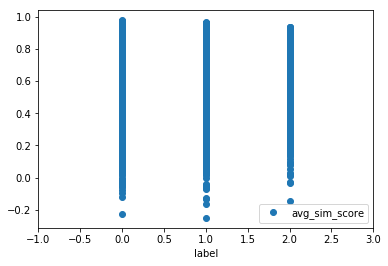

In [35]:
# plot the average scores of each label
_ = data2.plot(x='label', y='avg_sim_score', style='o')
_ = plt.xlim(-1, 3)

In [ ]:
model.docvecs['122094-20']

In [ ]:
v1 = model.docvecs['0']
v2 = model.docvecs['122094-20']
result = 1 - spatial.distance.cosine(v1, v2)
result

## How to work with the DataFrames

In [ ]:
# to go to a specific cleaned claim
data.cleaned_claim.loc[0]

In [ ]:
# to go to a specific cleaned article
articles.raw_articles.loc['134765'].iloc[0]

In [ ]:
# sample code to read elements from each article_array from the data dataframe

# to iterate the article array
for i in range(data.shape[0]):
    # i iterates row by row till the end
    for u in range(len(data.article_array[i])):
        # u holds the index of each element, within each array. Uncomment the following to understand
        # print(u)
        art_array = data.article_array[i]
        # print specific elements of each array
        print(art_array[u])